In [1]:
##Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split

In [2]:
#Importing Train data
df=pd.read_csv('digit_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
## There are 784 pixels so the image is 28x28 greyscale image
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [5]:
## There are images of digits from 0 to 9
## Each pixel has a number from 0 to 255 so it is the greyscale intensity
df['pixel500'].unique()

array([  0,   5, 210, 252, 193,  93, 242, 147,  17,  10, 231, 253, 139,
       251,   9, 112,  99,  85,  49,  43, 174,  53, 160,  31,  64, 144,
       150,  48, 164,  15,  70, 200, 229, 207, 136,  16, 254, 156,  38,
       224, 205,  46,  42, 135, 199, 203, 187,   3, 126,  12, 211,  22,
        98, 131,  35,  39, 110,  87, 170, 248,  56,  18, 189,  23, 245,
       201,  62,  76, 191,  80, 255,   8, 111,  95, 101, 145,   6, 243,
       216, 236,  33, 166, 108,  91, 241,  65,  77, 182, 128, 218,  40,
       176, 172, 234, 116, 192, 196,  94,  81, 157, 221, 162, 125,  52,
        79, 190,  25, 113, 250, 225,  58,   4, 228,  13,  63, 146, 140,
       119,  41,   1, 177,  84, 214,  29,  44, 197, 183,  57, 246, 165,
       247, 129,  28, 213, 109, 175,  20,  73, 161,  26,  54,   2, 115,
       152, 106, 222,  30,  24, 123, 158, 226, 178,  32,  14,   7, 134,
       227,  50, 141, 104, 127, 233,  83,  78,  55,  34, 198,  68, 114,
        72,  45,  61, 194, 149, 137,  11, 132, 102,  71, 130,  7

In [6]:
##Assigning images pixels data(independent) and Labels(Dependent)
x=df.iloc[:,1:]
y=df.iloc[:,0]

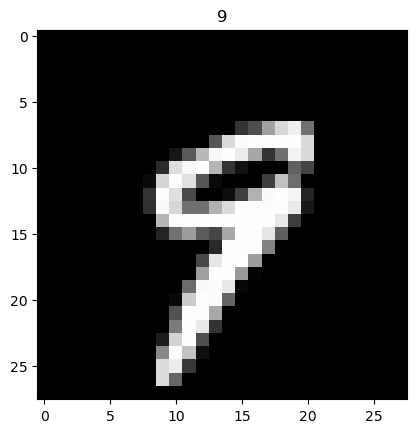

In [7]:
## Trying of different examples
row_index = 58
plt.title(df.iloc[row_index,0])
plt.imshow(df.iloc[row_index,1:].values.reshape((28,28)), cmap='gray')

In [8]:
df.isnull().sum() ##There are no null values

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
## Now our data is ready to use with our model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.01)

In [10]:
## Making a Neural Network with 3 layers
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(25,activation='relu',name='L1'),
        Dense(15,activation='relu',name='L2'),
        Dense(10,activation='linear',name='L3'),
        
    ], name = "my_model" 
)

In [11]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
## Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [14]:
## Training our model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_train,y_train,
    epochs=40
)

Epoch 1/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - loss: 4.5782
Epoch 2/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.0051
Epoch 3/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.6543
Epoch 4/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.4623
Epoch 5/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.3499
Epoch 6/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.2818
Epoch 7/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.2373
Epoch 8/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.2115
Epoch 9/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - loss: 0.1962
Epoch 10/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - loss: 0.1793
Epoch 11/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.1711
Epoch 12/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.1615
Epoch 13/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.1531
Epoch 14/40
1300/1300 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.1529
E

In [15]:
x_test.shape

(420, 784)

In [16]:
pred=[]
for i in range(420):
    prediction = model.predict(x_test.iloc[i].values.reshape(1, -1))
    pred.append(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy=accuracy_score(pred,y_test)
print("Accuracy = " + str(accuracy*100) + "%")

Accuracy = 95.71428571428572%
